In [69]:
"""
Model
"""

import os
import csv
import math
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

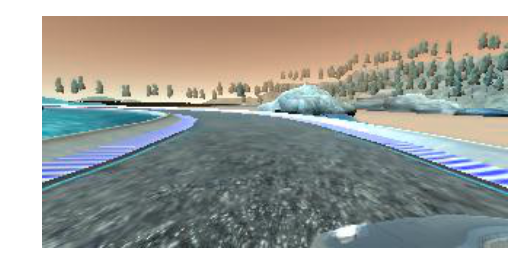

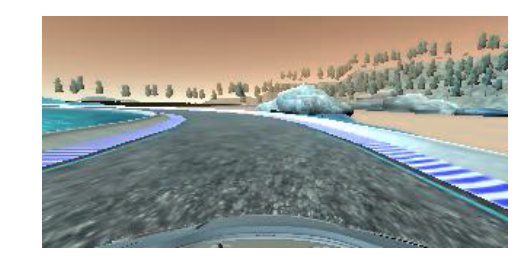

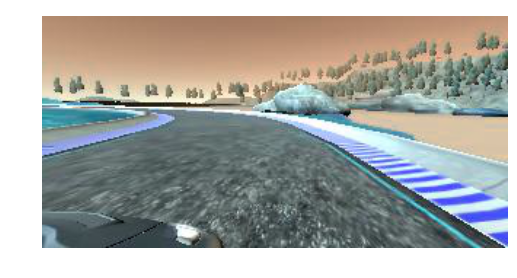

In [70]:
IMG_DIR = 'data/IMG/'
image_shape = (160,320,3)

def showImage(img):
    plt.figure()
    plt.axis('off')
    plt.imshow(img)

showImage(cv2.imread(os.path.join(IMG_DIR, 'left_2016_12_01_13_35_18_632.jpg')))
showImage(cv2.imread(os.path.join(IMG_DIR, 'center_2016_12_01_13_35_18_632.jpg')))
showImage(cv2.imread(os.path.join(IMG_DIR, 'right_2016_12_01_13_35_18_632.jpg')))

In [97]:
LABELS_FILENAME = 'data/driving_log.csv'

def DataGenerator():
    with open(LABELS_FILENAME, 'r') as labels_file:
        rdr=csv.DictReader(labels_file)
        for row in rdr:
            img = cv2.imread(os.path.join('data',row['center']))
            X = img.reshape(1,*image_shape)
            y = np.array(float(row['steering']), ndmin=1, dtype=np.float)
            print(X.shape, y.shape)
            yield (X, y)

numRows = 0
with open(LABELS_FILENAME, 'r') as labels_file:
    rdr=csv.DictReader(labels_file)
    for row in rdr:
        numRows += 1 
print(numRows)

8036


In [105]:

model = Sequential()

model.add(Conv2D(32, 11, 11, input_shape=image_shape))
model.add(MaxPooling2D((5,5)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(64, 5, 5, input_shape=image_shape))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(128, 3, 3, input_shape=image_shape))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(256, 3, 3, input_shape=image_shape))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_26 (Convolution2D) (None, 150, 310, 32)  11648       convolution2d_input_24[0][0]     
____________________________________________________________________________________________________
maxpooling2d_26 (MaxPooling2D)   (None, 30, 62, 32)    0           convolution2d_26[0][0]           
____________________________________________________________________________________________________
dropout_26 (Dropout)             (None, 30, 62, 32)    0           maxpooling2d_26[0][0]            
____________________________________________________________________________________________________
activation_26 (Activation)       (None, 30, 62, 32)    0           dropout_26[0][0]                 
___________________________________________________________________________________________

In [ ]:
# TODO: Compile and train the model here.
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit_generator(DataGenerator(), samples_per_epoch=numRows, nb_epoch=1, verbose=1, max_q_size=10)

Epoch 1/1
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
  10/8036 [..............................] - ETA: 632s - loss: 1.0000 - acc: 0.0000e+00(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
  22/8036 [..............................] - ETA: 305s - loss: 1.0000 - acc: 0.0000e+00(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
(1, 160, 320, 3) (1,)
  32/8036 [..............................] - ETA: 222s - loss: 1.0000 - acc: 0.0000e+00(1,